<a href="https://colab.research.google.com/github/Archishman-Ghosh/CNN-Model-to-Recognize-Handwritten-Digit/blob/master/CNN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Handwritten Digit Recognition Model**
###Applying **Convolutional Neural Networks (CNN)** with *Keras* using *TensorFlow* backend

## *-by*  ARCHISHMAN GHOSH

In [23]:
import keras
from keras.datasets import mnist
from keras.preprocessing import image
from keras.utils import to_categorical
from keras import layers, models

import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset :

In [24]:
data = mnist.load_data()

Separating the training and testing data -

In [25]:
(train_images, train_labels), (test_images, test_labels) = data

In [26]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

## Reshaping and Normalization of the images :

We need to reshape the images to the desired dimensions (here 28x28x1) before using them to train our model.

We also need to remember that, our test data as well as the images that the user will provide after training the model, should be reshaped to this same set of dimensions as that of the training data, before putting them for prediction.

Originally, all the values of the image data vary within the range 0-255.  
So, **Normalization** is required so that all the values are within the range 0-1, which is much easier to work with.

In [27]:
train_images = train_images.reshape((60000, 28, 28, 1)) #reshaping
train_images = train_images.astype('float')/255 #normalization

test_images = test_images.reshape((10000, 28, 28, 1)) #reshaping
test_images = test_images.astype('float')/255 #normalization

Checking some images with their labels -

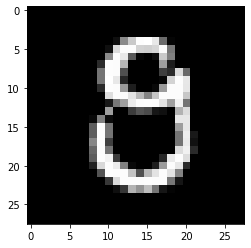

In [28]:
plt.imshow(image.array_to_img(train_images[80]), cmap="gray")

In [29]:
train_labels[80]

9

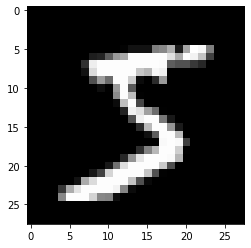

In [30]:
plt.imshow(image.array_to_img(train_images[0]), cmap="gray")

In [31]:
train_labels[0]

5

Converting the train_label and test_label data into catagorical form (in array format) -

In [32]:
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [33]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [34]:
train_labels_original[0]

5

In [35]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [36]:
model = models.Sequential()

### Adding **layers** to the model :

1st Convolution layer -

In [37]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


1st Pooling layer -

In [38]:
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


2nd Convolution layer :

In [39]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


2nd Pooling layer -

In [40]:
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


3rd Convolution layer -

In [41]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Flattening the data and adding a Dense layer -

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

Adding 2nd Dense layer -

In [43]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

### Training the model :

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=50, batch_size=64)

Epoch 1/50
60000/60000 [==============================] - 15s 245us/step - loss: 0.1676 - accuracy: 0.9476
Epoch 2/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0469 - accuracy: 0.9856
Epoch 3/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0323 - accuracy: 0.9902
Epoch 4/50
60000/60000 [==============================] - 8s 141us/step - loss: 0.0240 - accuracy: 0.9928
Epoch 5/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0188 - accuracy: 0.9939
Epoch 6/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0159 - accuracy: 0.9952
Epoch 7/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0135 - accuracy: 0.9960
Epoch 8/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.0105 - accuracy: 0.9970
Epoch 9/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0087 - accuracy: 0.9974
Epoch 10/50
60000/60000 [====================

### Accuracy of the model :

In [46]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 121us/step


In [47]:
test_accuracy

0.9937999844551086

In [48]:
test_loss

0.12707507351837502

### Checking predictions for the testing data :

In [49]:
predictions = model.predict_classes(test_images)
p = pd.DataFrame(list(zip(test_labels_original,predictions)), columns = ['original_digit','predicted_digit'])
p.head()

,original_digit,predicted_digit
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


##**Predicting user provided images -**

In [50]:
img = image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/newimg.jpg",grayscale=True,target_size=(28,28,1))
test_img = image.img_to_array(img)
test_img = test_img.reshape((1,28,28,1))
test_img = test_img.astype('float')/255 #normalization
prediction = model.predict_classes(test_img)[0]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Original Image : -


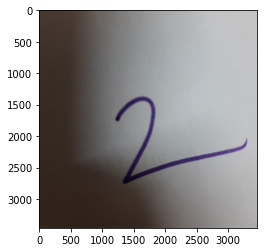

In [51]:
print('Original Image : -')
plt.imshow(image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/newimg.jpg"))

In [52]:
print('Predicted = ',prediction)

Predicted =  2


In [53]:
img = image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/11111.jpg",grayscale=True,target_size=(28,28,1))
test_img = image.img_to_array(img)
test_img = test_img.reshape((1,28,28,1))
test_img = test_img.astype('float')/255 #normalization
prediction = model.predict_classes(test_img)[0]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Original Image : -


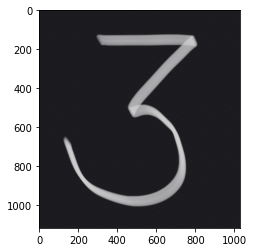

In [54]:
print('Original Image : -')
plt.imshow(image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/11111.jpg"))

In [55]:
print('Predicted = ',prediction)

Predicted =  3


In [56]:
img = image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/11112.jpg",color_mode = "grayscale",target_size=(28,28,1))
test_img = image.img_to_array(img)
test_img = test_img.reshape((1,28,28,1))
test_img = test_img.astype('float')/255 #normalization
prediction = model.predict_classes(test_img)[0]

Original Image : -


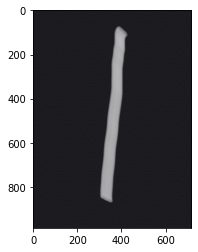

In [57]:
print('Original Image : -')
plt.imshow(image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/11112.jpg"))

In [58]:
print('Predicted = ',prediction)

Predicted =  1


In [59]:
img = image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/11113.jpg",grayscale=True,target_size=(28,28,1))
test_img = image.img_to_array(img)
test_img = test_img.reshape((1,28,28,1))
test_img = test_img.astype('float')/255 #normalization
prediction = model.predict_classes(test_img)[0]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Original Image : -


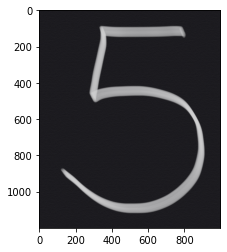

In [60]:
print('Original Image : -')
plt.imshow(image.load_img(path="/content/drive/My Drive/Colab Notebooks/Digit-Prediction-Images/11113.jpg"))

In [61]:
print('Predicted = ',prediction)

Predicted =  5
